In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
dane = pd.read_csv('/content/unclean_smartwatch_health_data.csv')
#Weryfikacja rodzaju kolumn
print(type(dane))

print(dane.head())
print(dane.describe)
print(dane.info)
print(dane.dtypes)


<class 'pandas.core.frame.DataFrame'>
   User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
0   4174.0         58.939776               98.809650   5450.390578   
1      NaN               NaN               98.532195    727.601610   
2   1860.0        247.803052               97.052954   2826.521994   
3   2294.0         40.000000               96.894213  13797.338044   
4   2130.0         61.950165               98.583797  15679.067648   

  Sleep Duration (hours) Activity Level Stress Level  
0      7.167235622316564  Highly Active            1  
1      6.538239375570314  Highly_Active            5  
2                  ERROR  Highly Active            5  
3      7.367789630207228          Actve            3  
4                    NaN  Highly_Active            6  
<bound method NDFrame.describe of       User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
0      4174.0         58.939776               98.809650   5450.390578   
1         NaN               NaN

In [4]:
#Sprawdzanie NULL
wartosci_0 = dane.isnull().sum()
print(wartosci_0)

#Przygotowanie funkcji

def remove_nulls(df,column):
  return df[df[column].notnull()]

def remove_duplicates(df, column):
  return df.drop_duplicates(subset = column)

def remove_errors(df, column):
  #Zamienia wartości nieliczbowe na NaN
  df[column] = pd.to_numeric(df[column], errors = 'coerce')
  #Usuwa NaN
  return df.dropna(subset = [column])



User ID                   201
Heart Rate (BPM)          400
Blood Oxygen Level (%)    300
Step Count                100
Sleep Duration (hours)    150
Activity Level            200
Stress Level              200
dtype: int64


## Za ***późno***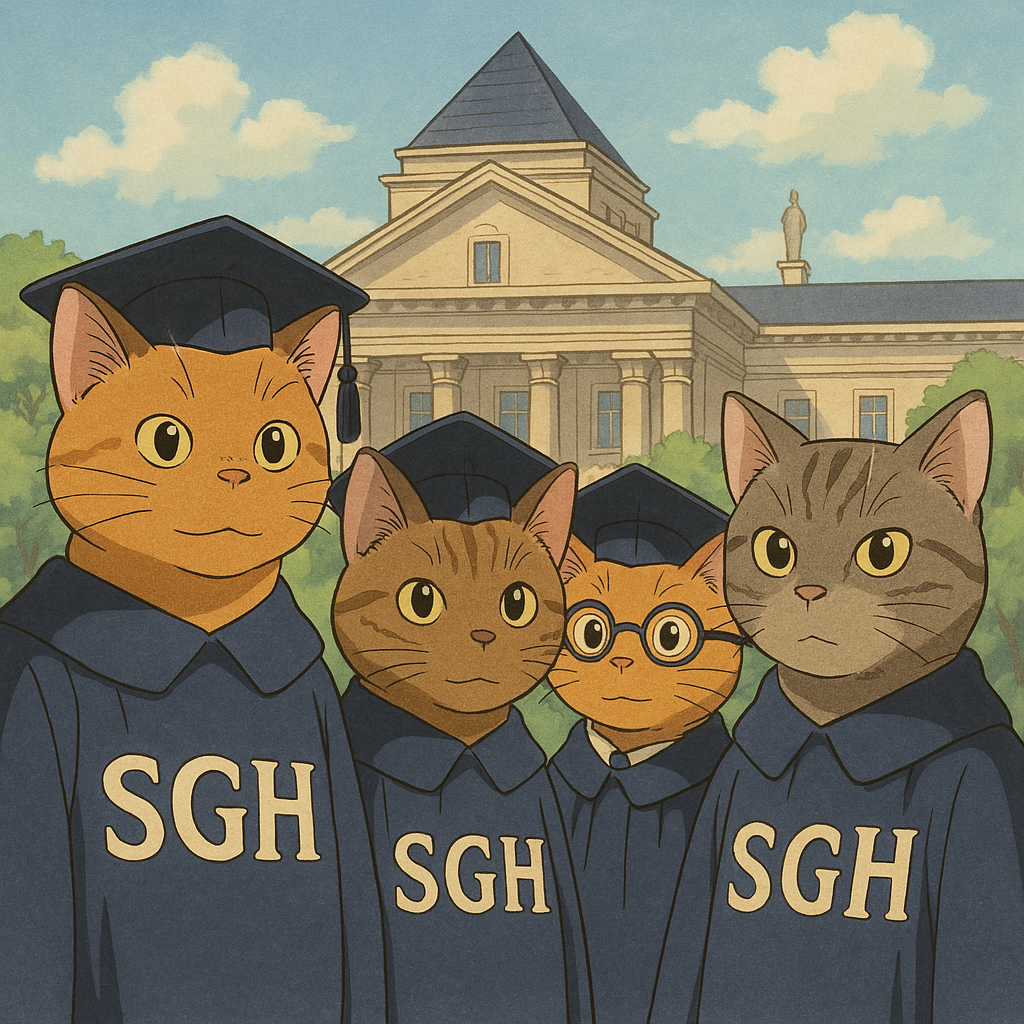

In [5]:
#Czyszczenie kolumny 'Activity Level'
y = dane.groupby('Activity Level')['User ID'].count() #BŁĄD (PIERWSZA WERSJA WYŚWIETLA DANE TAKIE SAME JAK POPRAWIONA)
print(f'pierwsza wersja:\n{y}')
#Tworzenie słownika
category_map = {
    'Actve':'Active',
    'Highly Active':'Highly_Active',
    'Seddentary':'Sedentary'
}
dane['Activity Level'] = dane['Activity Level'].replace(category_map)
x = dane.groupby('Activity Level')['User ID'].count()
print(f'poprawiona wersja:\n{x}')


pierwsza wersja:
Activity Level
Active           1613
Actve            1592
Highly Active    1626
Highly_Active    1520
Seddentary       1639
Sedentary        1612
Name: User ID, dtype: int64
poprawiona wersja:
Activity Level
Active           3205
Highly_Active    3146
Sedentary        3251
Name: User ID, dtype: int64


In [6]:
z = dane.groupby('Stress Level')['User ID'].count()
print(f'pierwsza wersja:\n{z}') #BŁĄD (PIERWSZA WERSJA WYŚWIETLA DANE TAKIE SAME JAK POPRAWIONA)
#Tworzenie słownika
category_map = {
    'Very High':'11'
}
dane['Stress Level'] = dane['Stress Level'].replace(category_map)
v = dane.groupby('Stress Level')['User ID'].count()
print(f'poprawiona wersja:\n{v}')

pierwsza wersja:
Stress Level
1            960
10           931
2            992
3            973
4            944
5            936
6            983
7            980
8            893
9            962
Very High     49
Name: User ID, dtype: int64
poprawiona wersja:
Stress Level
1     960
10    931
11     49
2     992
3     973
4     944
5     936
6     983
7     980
8     893
9     962
Name: User ID, dtype: int64


In [7]:
print(dane.groupby('Sleep Duration (hours)')['User ID'].count()) #BŁĄD (PIERWSZA WERSJA WYŚWIETLA DANE TAKIE SAME JAK POPRAWIONA)

dane = dane.pipe(remove_errors, column = 'Sleep Duration (hours)')

print(f"poprawiona wersja:\n{dane.groupby('Sleep Duration (hours)')['User ID'].count()}")

Sleep Duration (hours)
-0.1944527906201543      1
0.5899874330568986       1
1.1086136901126222       1
1.2874439245359204       1
1.4025072035369401       1
                      ... 
9.955174267793069        1
9.956615656710275        1
9.969903838658563        1
9.978049604724797        1
ERROR                  240
Name: User ID, Length: 9604, dtype: int64
poprawiona wersja:
Sleep Duration (hours)
-0.194453     1
 0.589987     1
 1.108614     1
 1.287444     1
 1.402507     1
             ..
 11.258370    1
 11.587615    1
 11.658064    1
 11.908386    1
 12.140233    1
Name: User ID, Length: 9603, dtype: int64


In [8]:
print(dane.isnull().sum())
print(dane['Heart Rate (BPM)'])
median = dane['Heart Rate (BPM)'].median()
print(median)
dane['Heart Rate (BPM)'] = dane['Heart Rate (BPM)'].fillna(median)
print(dane['Heart Rate (BPM)'].isnull().sum())

User ID                   189
Heart Rate (BPM)          385
Blood Oxygen Level (%)    289
Step Count                 95
Sleep Duration (hours)      0
Activity Level            197
Stress Level              193
dtype: int64
0       58.939776
1             NaN
3       40.000000
5       96.285938
6       47.272257
          ...    
9995    78.819386
9996    48.632659
9997    73.834442
9998          NaN
9999    70.063864
Name: Heart Rate (BPM), Length: 9603, dtype: float64
75.26848174177482
0


In [9]:
print(dane['Blood Oxygen Level (%)'])
print(dane['Blood Oxygen Level (%)'].isnull().sum())
print(min(dane['Blood Oxygen Level (%)']))
srednia_bpm = dane['Blood Oxygen Level (%)'].mean()
dane['Blood Oxygen Level (%)'] = dane['Blood Oxygen Level (%)'].fillna(srednia_bpm)


0       98.809650
1       98.532195
3       96.894213
5       94.202910
6       95.389760
          ...    
9995    98.931927
9996    95.773035
9997    97.945874
9998    98.401058
9999    98.475606
Name: Blood Oxygen Level (%), Length: 9603, dtype: float64
289
90.79120814564097


In [10]:
srednia_krok = dane['Step Count'].mean()
dane['Step Count'] = dane['Step Count'].fillna(srednia_krok)
print(dane['Step Count'].isnull().sum())


0


In [11]:
dane = dane.pipe(remove_nulls,column ='Activity Level')
print(dane['Activity Level'].unique())

['Highly_Active' 'Active' 'Sedentary']


In [12]:
dane = dane.pipe(remove_nulls,column ='Stress Level')
print(dane['Stress Level'].unique())
print(dane.isnull().sum())

['1' '5' '3' '10' '2' '8' '9' '4' '11' '7' '6']
User ID                   183
Heart Rate (BPM)            0
Blood Oxygen Level (%)      0
Step Count                  0
Sleep Duration (hours)      0
Activity Level              0
Stress Level                0
dtype: int64


In [13]:
print(max(dane['User ID']))
print(min(dane['User ID']))
print(dane['User ID'].isnull().sum())
random_ids = np.random.choice(range(200, 800), size=183, replace=False)
#dane.iloc[dane['User ID'].isna(), 'User ID'] = random_ids
ilosc = dane.groupby('User ID')['User ID'].count()

print(dane.head())

x = dane.drop('User ID',axis=1)
x = x.reset_index(drop=True)
print(x)
#OPISAĆ W STORYTELLINGU

4999.0
1001.0
183
   User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
0   4174.0         58.939776               98.809650   5450.390578   
1      NaN         75.268482               98.532195    727.601610   
3   2294.0         40.000000               96.894213  13797.338044   
5   2095.0         96.285938               94.202910  10205.992256   
6   4772.0         47.272257               95.389760   3208.781177   

   Sleep Duration (hours) Activity Level Stress Level  
0                7.167236  Highly_Active            1  
1                6.538239  Highly_Active            5  
3                7.367790         Active            3  
5                8.378343  Highly_Active           10  
6                7.871146      Sedentary            2  
      Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
0            58.939776               98.809650   5450.390578   
1            75.268482               98.532195    727.601610   
2            40.000000           

<Axes: xlabel='Heart Rate (BPM)'>

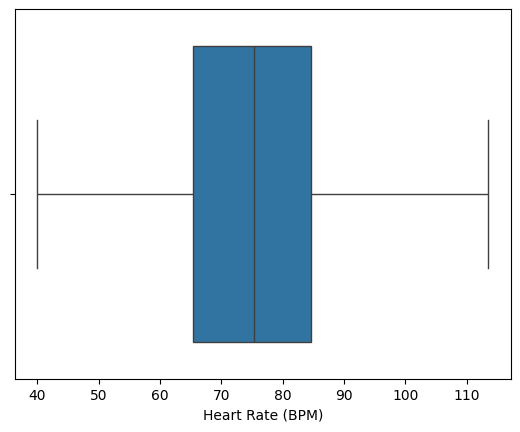

In [16]:

q1=x["Heart Rate (BPM)"].quantile(0.25)
q3=x["Heart Rate (BPM)"].quantile(0.75)
iqr=q3-q1
lower_border = q1-1.5*iqr
upper_border = q3+1.5*iqr
x = x[(x['Heart Rate (BPM)']>=lower_border)&(x['Heart Rate (BPM)']<=upper_border)]
sns.boxplot(x=x["Heart Rate (BPM)"])

In [19]:
print(x.dtypes)

Heart Rate (BPM)          float64
Blood Oxygen Level (%)    float64
Step Count                float64
Sleep Duration (hours)    float64
Activity Level             object
Stress Level               object
dtype: object


In [21]:
def outliers(df):
  df_clear=df.copy()
  for col in df.select_dtypes(include="number").columns:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lower_border = q1-1.5*iqr
    upper_border = q3+1.5*iqr
    df_clear = df[(df[col]>=lower_border)&(df[col]<=upper_border)]
  return df_clear
x_clear = x.pipe(outliers).reset_index(drop=True)
x_clear.to_csv("cleaned_data.csv",index=True)